In [554]:
import pandas as pd
import numpy as np
import os
from pandas import Series, DataFrame
import glob

#used glob as to combine csv files by year
glob.glob('data_euros/data_euros*.csv')
all_dfs = []
for one_filename in glob.glob('data_euros/data_euros*.csv'):
    #print (f'Loading[={one_filename}')
    new_df = pd.read_csv(one_filename,
            usecols=['home_score', 'away_score', 'match_attendance'])
    all_dfs.append(new_df)

In [550]:
len(all_dfs)

17

In [529]:
df = pd.concat(all_dfs)

In [597]:
import pandas as pd
import glob
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load and concatenate DataFrames from multiple CSV files
all_dfs = []
for one_filename in glob.glob('data_euros/data_euros*.csv'):
    print(f'Loading {one_filename}')
    new_df = pd.read_csv(one_filename)
    all_dfs.append(new_df)

# Concatenate all DataFrames into one
df = pd.concat(all_dfs, ignore_index=True)

# Step 2: Handle missing values
# Replace NaNs in numerical columns with the mean of the column
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Drop rows with NaNs in categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
df.dropna(subset=categorical_cols, inplace=True)

# Step 3: Select relevant features and target variable
features = ['home_team', 'away_team', 'home_score', 'away_score', 'match_attendance', 'stadium_capacity', 'condition_weather', 'stadium_name']
target = 'winner'

df = df[features + [target]]  # Ensure only rows with complete data for selected features are used

# Step 4: Encode categorical variables
df = pd.get_dummies(df, columns=['home_team', 'away_team', 'condition_weather', 'stadium_name'])

# Step 5: Split data into training and testing sets
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Initialize and train RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Step 7: Predict on the test set and evaluate the model
y_pred = clf.predict(X_test)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))

# Optional Step 9: Parameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

grid_search.fit(X_train, y_train)

best_estimator = grid_search.best_estimator_
print("Best parameters found:")
print(grid_search.best_params_)

# Step 10: Use the best estimator for predictions
y_pred_grid = best_estimator.predict(X_test)
accuracy_grid = accuracy_score(y_test, y_pred_grid)
print(f'Accuracy with best estimator: {accuracy_grid:.2f}')

# Step 11: Plotting the results
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_grid)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot feature importance
importances = best_estimator.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


Loading data_euros/data_euros_2024.csv
Loading data_euros/data_euros_2008.csv
Loading data_euros/data_euros_2020.csv
Loading data_euros/data_euros_1980.csv
Loading data_euros/data_euros_1996.csv
Loading data_euros/data_euros_1968.csv
Loading data_euros/data_euros_1992.csv
Loading data_euros/data_euros_1984.csv
Loading data_euros/data_euros_1988.csv
Loading data_euros/data_euros_1976.csv
Loading data_euros/data_euros_1960.csv
Loading data_euros/data_euros_1964.csv
Loading data_euros/data_euros_1972.csv
Loading data_euros/data_euros_2004.csv
Loading data_euros/data_euros_2012.csv
Loading data_euros/data_euros_2016.csv
Loading data_euros/data_euros_2000.csv


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [556]:
import pandas as pd
import glob
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
#randomforestclassifier
# Step 1: Load and concatenate DataFrames from multiple CSV files
all_dfs = []
for one_filename in glob.glob('data_euros/data_euros*.csv'):
    print(f'Loading {one_filename}')
    new_df = pd.read_csv(one_filename)
    all_dfs.append(new_df)

# Concatenate all DataFrames into one
df = pd.concat(all_dfs, ignore_index=True)

# Step 2: Select relevant features and target variable
features = ['home_team', 'away_team', 'home_score', 'away_score', 'match_attendance', 'stadium_capacity', 'condition_weather', 'stadium_name']
target = 'winner'

df = df[features + [target]].dropna()  # Ensure only rows with complete data for selected features are used

# Step 3: Encode categorical variables
df = pd.get_dummies(df, columns=['home_team', 'away_team', 'condition_weather', 'stadium_name'])

# Step 4: Split data into training and testing sets
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Initialize and train RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Step 6: Predict on the test set and evaluate the model
y_pred = clf.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))

# Step 8: Parameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

grid_search.fit(X_train, y_train)

best_estimator = grid_search.best_estimator_
print("Best parameters found:")
print(grid_search.best_params_)

# Step 9: Use the best estimator for predictions
y_pred_grid = best_estimator.predict(X_test)
accuracy_grid = accuracy_score(y_test, y_pred_grid)
print(f'Accuracy with best estimator: {accuracy_grid:.2f}')


Loading data_euros/data_euros_2024.csv
Loading data_euros/data_euros_2008.csv
Loading data_euros/data_euros_2020.csv
Loading data_euros/data_euros_1980.csv
Loading data_euros/data_euros_1996.csv
Loading data_euros/data_euros_1968.csv
Loading data_euros/data_euros_1992.csv
Loading data_euros/data_euros_1984.csv
Loading data_euros/data_euros_1988.csv
Loading data_euros/data_euros_1976.csv
Loading data_euros/data_euros_1960.csv
Loading data_euros/data_euros_1964.csv
Loading data_euros/data_euros_1972.csv
Loading data_euros/data_euros_2004.csv
Loading data_euros/data_euros_2012.csv
Loading data_euros/data_euros_2016.csv
Loading data_euros/data_euros_2000.csv
Accuracy: 0.65
                     precision    recall  f1-score   support

            Belgium       1.00      1.00      1.00         1
            Croatia       1.00      0.50      0.67         2
            Czechia       0.50      1.00      0.67         1
            Denmark       1.00      1.00      1.00         1
            Engl

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/

Best parameters found:
{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy with best estimator: 0.65


Loading data_euros/data_euros_2024.csv
Loading data_euros/data_euros_2008.csv
Loading data_euros/data_euros_2020.csv
Loading data_euros/data_euros_1980.csv
Loading data_euros/data_euros_1996.csv
Loading data_euros/data_euros_1968.csv
Loading data_euros/data_euros_1992.csv
Loading data_euros/data_euros_1984.csv
Loading data_euros/data_euros_1988.csv
Loading data_euros/data_euros_1976.csv
Loading data_euros/data_euros_1960.csv
Loading data_euros/data_euros_1964.csv
Loading data_euros/data_euros_1972.csv
Loading data_euros/data_euros_2004.csv
Loading data_euros/data_euros_2012.csv
Loading data_euros/data_euros_2016.csv
Loading data_euros/data_euros_2000.csv
Accuracy: 0.65


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/

                     precision    recall  f1-score   support

            Belgium       1.00      1.00      1.00         1
            Croatia       1.00      0.50      0.67         2
            Czechia       0.50      1.00      0.67         1
            Denmark       1.00      1.00      1.00         1
            England       1.00      1.00      1.00         4
             France       0.33      1.00      0.50         1
            Germany       0.50      1.00      0.67         2
              Italy       1.00      1.00      1.00         3
        Netherlands       1.00      1.00      1.00         3
             Poland       0.00      0.00      0.00         2
           Portugal       0.00      0.00      0.00         3
Republic of Ireland       0.00      0.00      0.00         0
             Russia       0.00      0.00      0.00         1
           Slovakia       0.00      0.00      0.00         1
              Spain       0.60      1.00      0.75         3
             Sweden    

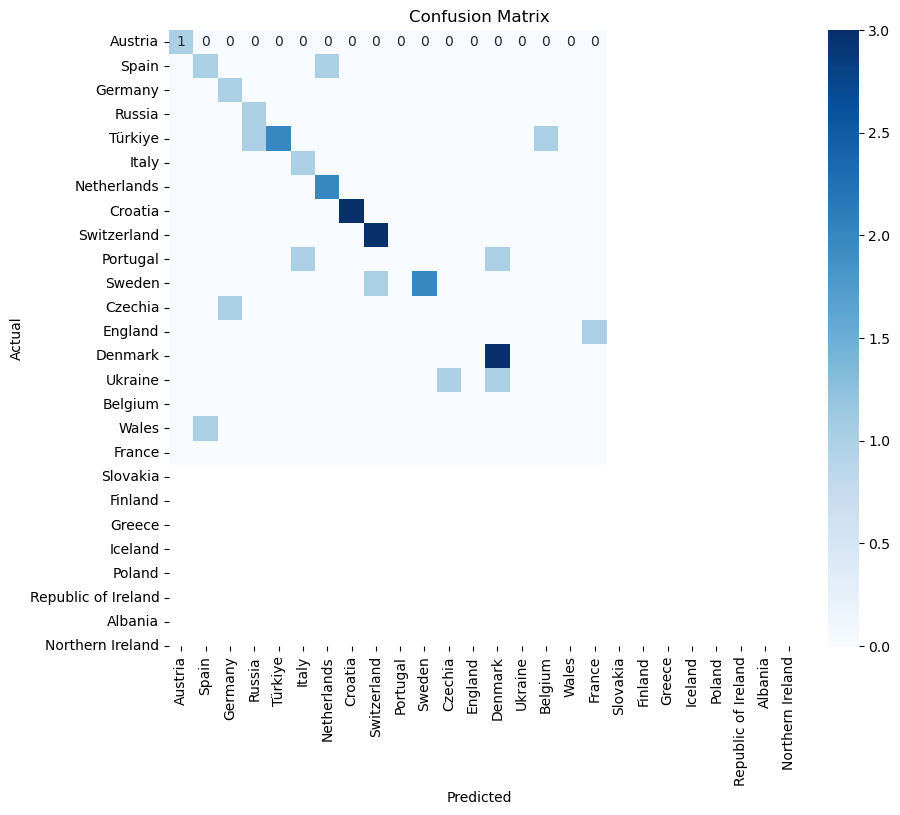

IndexError: tuple index out of range

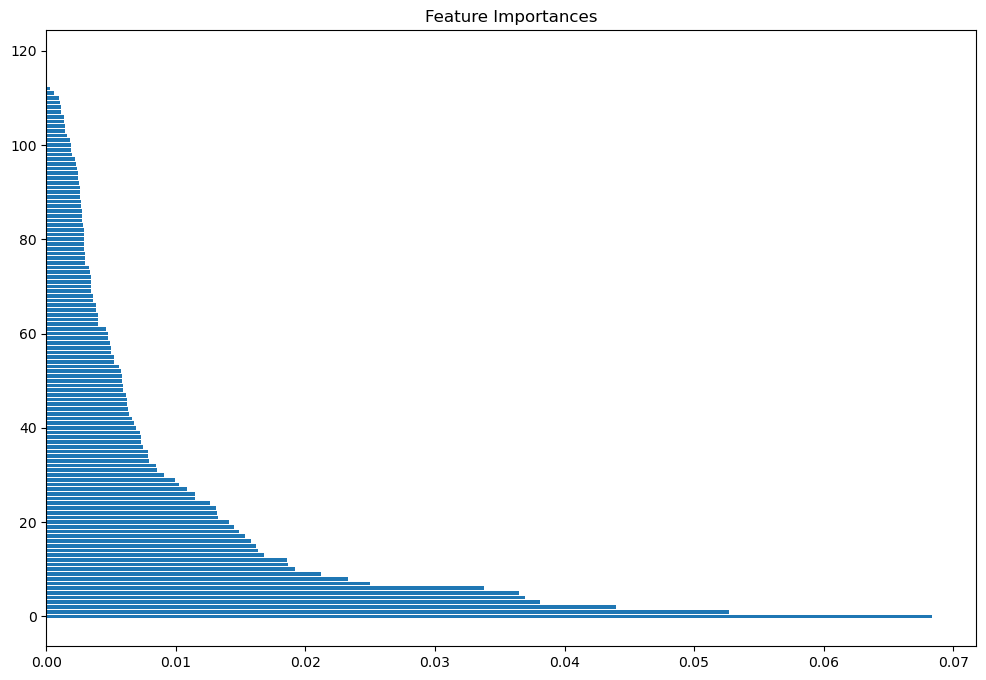

In [609]:
import pandas as pd
import glob
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load and concatenate DataFrames from multiple CSV files
all_dfs = []
for one_filename in glob.glob('data_euros/data_euros*.csv'):
    print(f'Loading {one_filename}')
    new_df = pd.read_csv(one_filename)
    all_dfs.append(new_df)

# Concatenate all DataFrames into one
df = pd.concat(all_dfs, ignore_index=True)

# Step 2: Select relevant features and target variable
features = ['home_team', 'away_team', 'home_score', 'away_score', 'match_attendance', 'stadium_capacity', 'condition_weather', 'stadium_name']
target = 'winner'

df = df[features + [target]].dropna()  # Ensure only rows with complete data for selected features are used

# Step 3: Encode categorical variables
df = pd.get_dummies(df, columns=['home_team', 'away_team', 'condition_weather', 'stadium_name'])

# Step 4: Split data into training and testing sets
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize and train RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

#Predict on the test set and evaluate the model
y_pred = clf.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))

#Parameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

grid_search.fit(X_train, y_train)

best_estimator = grid_search.best_estimator_
print("Best parameters found:")
print(grid_search.best_params_)

#Use the best estimator for predictions
y_pred_grid = best_estimator.predict(X_test)
accuracy_grid = accuracy_score(y_test, y_pred_grid)
print(f'Accuracy with best estimator: {accuracy_grid:.2f}')

#Plot confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_grid)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

#Plot feature importances
importances = best_estimator.feature_importances_
features = X.columns

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [features[i] for i in indices]

plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.yticks(range(X.shape[10]), names)
plt.xlabel('Relative Importance')
plt.gca().invert_yaxis()
plt.show()


In [486]:
import pandas as pd
import numpy as np
import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
#tensorflow
# Step 1: Load and concatenate DataFrames from multiple CSV files
all_dfs = []
for filename in glob.glob('data_euros/data_euros*.csv'):
    df = pd.read_csv(filename)
    all_dfs.append(df)

df = pd.concat(all_dfs, ignore_index=True)

# Step 2: Handle NaN values (if any)
df.dropna(subset=['winner'], inplace=True)  # Drop rows where 'winner' is NaN

# Step 3: One-hot encode the target variable 'winner'
encoder = OneHotEncoder(sparse=False)
winner_encoded = encoder.fit_transform(df[['winner']])
columns = encoder.categories_[0]

# Append the one-hot encoded columns to the dataframe
df_encoded = pd.concat([df, pd.DataFrame(winner_encoded, columns=columns)], axis=1)

# Step 4: Separate Features (X) and Target Variables (y)
X = df_encoded[['home_score', 'away_score', 'match_attendance', 'stadium_capacity', 'year']]

# Select the one-hot encoded columns as y
y = df_encoded[columns]

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Normalize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Build the TensorFlow model
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  #Define input shape
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(columns), activation='softmax')  #Output layer matches the number of unique classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Train model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

#Evaluate model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy}")

#Predictions
predictions = model.predict(X_test_scaled)

Epoch 1/50


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1424 - loss: nan - val_accuracy: 0.1333 - val_loss: nan
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1952 - loss: nan - val_accuracy: 0.1333 - val_loss: nan
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2070 - loss: nan - val_accuracy: 0.1333 - val_loss: nan
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1986 - loss: nan - val_accuracy: 0.1333 - val_loss: nan
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2020 - loss: nan - val_accuracy: 0.1333 - val_loss: nan
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1983 - loss: nan - val_accuracy: 0.1333 - val_loss: nan
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2010 - loss: nan - val_accuracy: 0.1333 - val_loss: nan
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2132 - loss: nan - val_accuracy: 0.1333 - val_loss: nan
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

In [568]:
import pandas as pd
import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam

# Step 1: Load and concatenate DataFrames from multiple CSV files
all_dfs = []
for filename in glob.glob('data_euros/data_euros*.csv'):
    df = pd.read_csv(filename)
    all_dfs.append(df)

df = pd.concat(all_dfs, ignore_index=True)

df['home_score'].fillna(df['home_score'].mean(), inplace=True)
df['away_score'].fillna(df['away_score'].mean(), inplace=True)

def calculate_recent_form(df, window=5):
    from collections import defaultdict

    team_form = defaultdict(lambda: defaultdict(int))

    for index, row in df.iterrows():
        home_team = row['home_team']
        away_team = row['away_team']
        home_score = row['home_score']
        away_score = row['away_score']

        # Update recent form for home and away teams
        team_form[home_team]['goals_scored'] += home_score
        team_form[away_team]['goals_scored'] += away_score

    # Calculate average form over the window size
    for team in team_form:
        team_form[team]['avg_goals_scored'] = team_form[team]['goals_scored'] / window

    # Merge average form back into main DataFrame
    for index, row in df.iterrows():
        home_team = row['home_team']
        away_team = row['away_team']
        df.at[index, 'home_avg_goals_scored'] = team_form[home_team]['avg_goals_scored']
        df.at[index, 'away_avg_goals_scored'] = team_form[away_team]['avg_goals_scored']

    return df

# Apply the function to add recent team form features
df = calculate_recent_form(df)


# Step 4: Select Features (X) and Target Variables (y)
X = df[['home_score', 'away_score', 'match_attendance', 'stadium_capacity', 'home_avg_goals_scored', 'away_avg_goals_scored']]
y = df['winner']

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Normalize input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Build the TensorFlow model
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.5),  # Example of dropout regularization
    Dense(32, activation='relu'),
    Dense(len(df['winner'].unique()), activation='softmax')  # Adjust output layer based on number of unique classes
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 8: Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# Step 9: Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy}")

# Step 10: Make predictions
predictions = model.predict(X_test_scaled)


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [570]:
print(X_train_scaled.dtype)
print(y_train.dtype)

float64
object


In [591]:
import pandas as pd
import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam

# Load and concatenate DataFrames from multiple CSV files
all_dfs = []
for filename in glob.glob('data_euros/data_euros*.csv'):
    df = pd.read_csv(filename)
    all_dfs.append(df)

df = pd.concat(all_dfs, ignore_index=True)

# Handle NaN values
df['home_score'].fillna(df['home_score'].mean(), inplace=True)
df['away_score'].fillna(df['away_score'].mean(), inplace=True)


from sklearn.preprocessing import LabelEncoder

# Example: Convert 'home_team' column to numeric using LabelEncoder
label_encoder = LabelEncoder()
df['home_team_encoded'] = label_encoder.fit_transform(df['home_team'])

# Repeat for other categorical columns as needed
df['away_team_encoded'] = label_encoder.fit_transform(df['away_team'])
df['winner_encoded'] = label_encoder.fit_transform(df['winner'])
# And so on for each categorical column you want to encode

# Drop the original categorical columns if needed
df.drop(columns=['home_team', 'away_team', 'winner'], inplace=True)

# Optionally, you can create dummy variables if needed for certain models
# df = pd.get_dummies(df, columns=['encoded_column'])

# Display the modified DataFrame
print(df.head())

# Example: Feature engineering or additional preprocessing steps

# Select Features (X) and Target Variables (y)
X = df[['home_score', 'away_score', 'match_attendance', 'stadium_capacity']]
y = df['winner']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the TensorFlow model
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(len(df['winner'].unique()), activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Ensure numerical data types
X_train_scaled = X_train_scaled.astype('float32')
y_train = y_train.astype('int32')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy}")



   id_match home_team_code away_team_code  home_score  away_score  \
0   2036211            NaN            NaN    1.223097    1.125984   
1   2036210            NaN            NaN    1.223097    1.125984   
2   2036209            NaN            NaN    1.223097    1.125984   
3   2036207            NED            TUR    1.223097    1.125984   
4   2036208            ENG            SUI    1.223097    1.125984   

   home_penalty  away_penalty  home_score_total  away_score_total  \
0           NaN           NaN               NaN               NaN   
1           NaN           NaN               NaN               NaN   
2           NaN           NaN               NaN               NaN   
3           NaN           NaN               NaN               NaN   
4           NaN           NaN               NaN               NaN   

  winner_reason  ...     stadium_name_event stadium_name_sponsor home_lineups  \
0           NaN  ...         Olympiastadion       Olympiastadion          NaN   
1       

KeyError: 'winner'

In [581]:
# Assuming df is your DataFrame containing the data
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print("Categorical columns:")
print(categorical_columns)


Categorical columns:
['home_team', 'away_team', 'home_team_code', 'away_team_code', 'winner', 'winner_reason', 'date', 'date_time', 'group_name', 'matchday_name', 'condition_pitch', 'condition_weather', 'status', 'type', 'round', 'round_mode', 'stadium_country_code', 'goals', 'penalties_missed', 'penalties', 'red_cards', 'game_referees', 'stadium_city', 'stadium_name', 'stadium_name_media', 'stadium_name_official', 'stadium_name_event', 'stadium_name_sponsor', 'home_lineups', 'away_lineups', 'home_coaches', 'away_coaches', 'events']


In [451]:
# Initialize and train RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [457]:
# Predict on the test set
y_pred = rf_regressor.predict(X_test_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.2505120414287887
R-squared: -0.06282483097302616


In [558]:
import pandas as pd
import glob
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

#Decision tree classifier

# Step 1: Load and concatenate DataFrames from multiple CSV files
all_dfs = []
for one_filename in glob.glob('data_euros/data_euros*.csv'):
    print(f'Loading {one_filename}')
    new_df = pd.read_csv(one_filename)
    all_dfs.append(new_df)

# Concatenate all DataFrames into one
df = pd.concat(all_dfs, ignore_index=True)

# Step 2: Select relevant features and target variable
features = ['home_team', 'away_team', 'home_score', 'away_score', 'match_attendance', 'stadium_capacity', 'condition_weather', 'stadium_name']
target = 'winner'

df = df[features + [target]].dropna()  # Ensure only rows with complete data for selected features are used

# Step 3: Encode categorical variables
df = pd.get_dummies(df, columns=['home_team', 'away_team', 'condition_weather', 'stadium_name'])

# Step 4: Split data into training and testing sets
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Initialize and train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 6: Predict on the test set and evaluate the model
y_pred = clf.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))

Loading data_euros/data_euros_2024.csv
Loading data_euros/data_euros_2008.csv
Loading data_euros/data_euros_2020.csv
Loading data_euros/data_euros_1980.csv
Loading data_euros/data_euros_1996.csv
Loading data_euros/data_euros_1968.csv
Loading data_euros/data_euros_1992.csv
Loading data_euros/data_euros_1984.csv
Loading data_euros/data_euros_1988.csv
Loading data_euros/data_euros_1976.csv
Loading data_euros/data_euros_1960.csv
Loading data_euros/data_euros_1964.csv
Loading data_euros/data_euros_1972.csv
Loading data_euros/data_euros_2004.csv
Loading data_euros/data_euros_2012.csv
Loading data_euros/data_euros_2016.csv
Loading data_euros/data_euros_2000.csv
Accuracy: 0.55
              precision    recall  f1-score   support

     Belgium       0.50      1.00      0.67         1
     Croatia       0.50      0.50      0.50         2
     Czechia       0.33      1.00      0.50         1
     Denmark       1.00      1.00      1.00         1
     England       1.00      0.25      0.40        

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/

Loading data_euros/data_euros_2024.csv
Loading data_euros/data_euros_2008.csv
Loading data_euros/data_euros_2020.csv
Loading data_euros/data_euros_1980.csv
Loading data_euros/data_euros_1996.csv
Loading data_euros/data_euros_1968.csv
Loading data_euros/data_euros_1992.csv
Loading data_euros/data_euros_1984.csv
Loading data_euros/data_euros_1988.csv
Loading data_euros/data_euros_1976.csv
Loading data_euros/data_euros_1960.csv
Loading data_euros/data_euros_1964.csv
Loading data_euros/data_euros_1972.csv
Loading data_euros/data_euros_2004.csv
Loading data_euros/data_euros_2012.csv
Loading data_euros/data_euros_2016.csv
Loading data_euros/data_euros_2000.csv


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


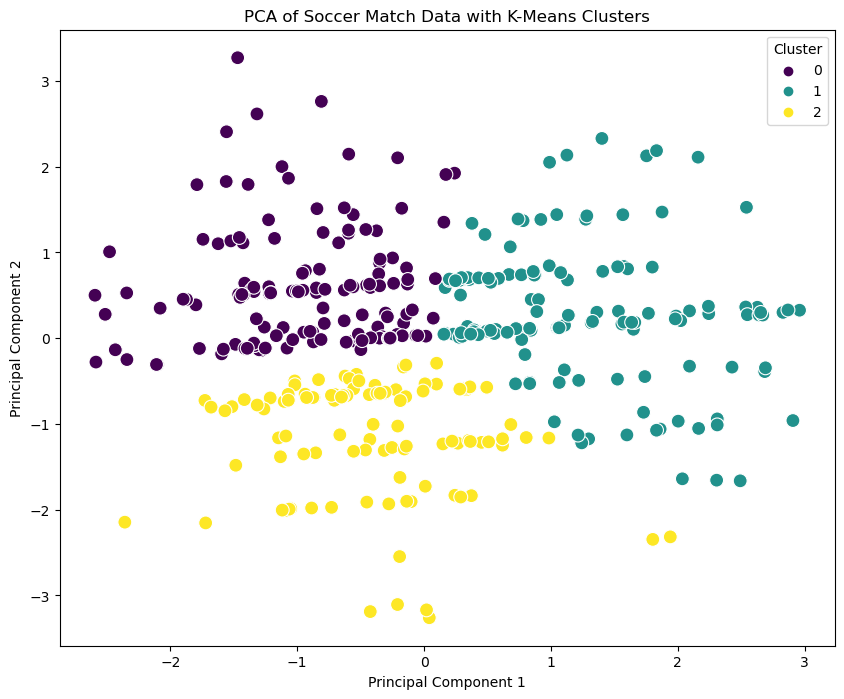

In [601]:
import pandas as pd
import glob
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load and concatenate DataFrames from multiple CSV files
all_dfs = []
for one_filename in glob.glob('data_euros/data_euros*.csv'):
    print(f'Loading {one_filename}')
    new_df = pd.read_csv(one_filename)
    all_dfs.append(new_df)

# Concatenate all DataFrames into one
df = pd.concat(all_dfs, ignore_index=True)

# Step 2: Select relevant features
features = ['home_score', 'away_score', 'match_attendance', 'stadium_capacity']
df = df[features].dropna()  # Ensure only rows with complete data for selected features are used

# Step 3: Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Step 4: Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Step 5: Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_pca)

# Step 6: Create a DataFrame for visualization
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = clusters

# Step 7: Plot the PCA results with clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis', s=100)
plt.title('PCA of Soccer Match Data with K-Means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


Loading data_euros/data_euros_2024.csv
Loading data_euros/data_euros_2008.csv
Loading data_euros/data_euros_2020.csv
Loading data_euros/data_euros_1980.csv
Loading data_euros/data_euros_1996.csv
Loading data_euros/data_euros_1968.csv
Loading data_euros/data_euros_1992.csv
Loading data_euros/data_euros_1984.csv
Loading data_euros/data_euros_1988.csv
Loading data_euros/data_euros_1976.csv
Loading data_euros/data_euros_1960.csv
Loading data_euros/data_euros_1964.csv
Loading data_euros/data_euros_1972.csv
Loading data_euros/data_euros_2004.csv
Loading data_euros/data_euros_2012.csv
Loading data_euros/data_euros_2016.csv
Loading data_euros/data_euros_2000.csv
Accuracy: 0.65
                     precision    recall  f1-score   support

            Belgium       1.00      1.00      1.00         1
            Croatia       1.00      0.50      0.67         2
            Czechia       0.50      1.00      0.67         1
            Denmark       1.00      1.00      1.00         1
            Engl

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/

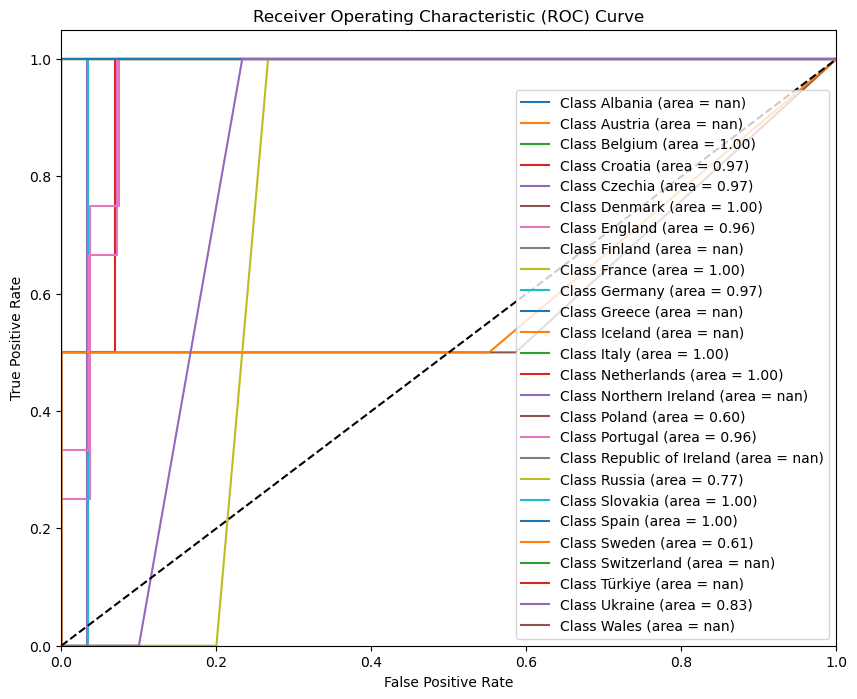

In [612]:
import pandas as pd
import glob
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Load and concatenate DataFrames from multiple CSV files
all_dfs = []
for one_filename in glob.glob('data_euros/data_euros*.csv'):
    print(f'Loading {one_filename}')
    new_df = pd.read_csv(one_filename)
    all_dfs.append(new_df)

# Concatenate all DataFrames into one
df = pd.concat(all_dfs, ignore_index=True)

# Select relevant features and target variable
features = ['home_team', 'away_team', 'home_score', 'away_score', 'match_attendance', 'stadium_capacity', 'condition_weather', 'stadium_name']
target = 'winner'

df = df[features + [target]].dropna()  # Ensure only rows with complete data for selected features are used

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['home_team', 'away_team', 'condition_weather', 'stadium_name'])

# Split data into training and testing sets
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set and evaluate the model
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

# Get predicted probabilities
y_prob = clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(clf.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == clf.classes_[i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve
plt.figure(figsize=(10, 8))
for i in range(len(clf.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {clf.classes_[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Loading data_euros/data_euros_2024.csv
Loading data_euros/data_euros_2008.csv
Loading data_euros/data_euros_2020.csv
Loading data_euros/data_euros_1980.csv
Loading data_euros/data_euros_1996.csv
Loading data_euros/data_euros_1968.csv
Loading data_euros/data_euros_1992.csv
Loading data_euros/data_euros_1984.csv
Loading data_euros/data_euros_1988.csv
Loading data_euros/data_euros_1976.csv
Loading data_euros/data_euros_1960.csv
Loading data_euros/data_euros_1964.csv
Loading data_euros/data_euros_1972.csv
Loading data_euros/data_euros_2004.csv
Loading data_euros/data_euros_2012.csv
Loading data_euros/data_euros_2016.csv
Loading data_euros/data_euros_2000.csv
winner
Spain                  13
Italy                  12
Germany                10
France                  8
Czechia                 8
Portugal                7
Belgium                 6
England                 6
Wales                   5
Netherlands             5
Croatia                 5
Türkiye                 4
Denmark           

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packa

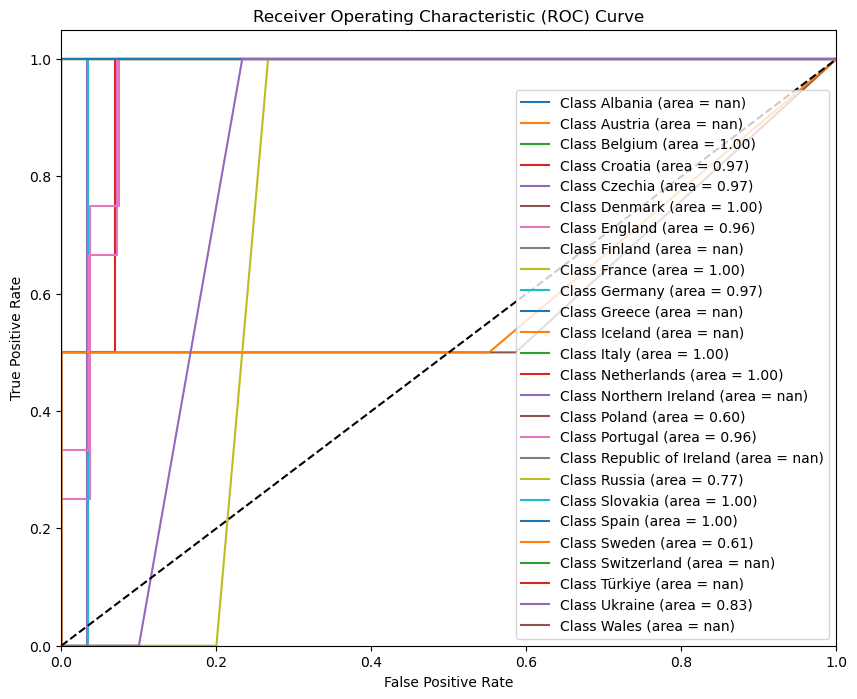

In [614]:
import pandas as pd
import glob
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Load and concatenate DataFrames from multiple CSV files
all_dfs = []
for one_filename in glob.glob('data_euros/data_euros*.csv'):
    print(f'Loading {one_filename}')
    new_df = pd.read_csv(one_filename)
    all_dfs.append(new_df)

# Concatenate all DataFrames into one
df = pd.concat(all_dfs, ignore_index=True)

# Select relevant features and target variable
features = ['home_team', 'away_team', 'home_score', 'away_score', 'match_attendance', 'stadium_capacity', 'condition_weather', 'stadium_name']
target = 'winner'

df = df[features + [target]].dropna()  # Ensure only rows with complete data for selected features are used

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['home_team', 'away_team', 'condition_weather', 'stadium_name'])

# Split data into training and testing sets
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check class distribution
print(y_train.value_counts())
print(y_test.value_counts())

# Initialize and train RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set and evaluate the model
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred, zero_division=0))

# Get predicted probabilities
y_prob = clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(clf.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == clf.classes_[i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve
plt.figure(figsize=(10, 8))
for i in range(len(clf.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {clf.classes_[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Loading data_euros/data_euros_2024.csv
Loading data_euros/data_euros_2008.csv
Loading data_euros/data_euros_2020.csv
Loading data_euros/data_euros_1980.csv
Loading data_euros/data_euros_1996.csv
Loading data_euros/data_euros_1968.csv
Loading data_euros/data_euros_1992.csv
Loading data_euros/data_euros_1984.csv
Loading data_euros/data_euros_1988.csv
Loading data_euros/data_euros_1976.csv
Loading data_euros/data_euros_1960.csv
Loading data_euros/data_euros_1964.csv
Loading data_euros/data_euros_1972.csv
Loading data_euros/data_euros_2004.csv
Loading data_euros/data_euros_2012.csv
Loading data_euros/data_euros_2016.csv
Loading data_euros/data_euros_2000.csv


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


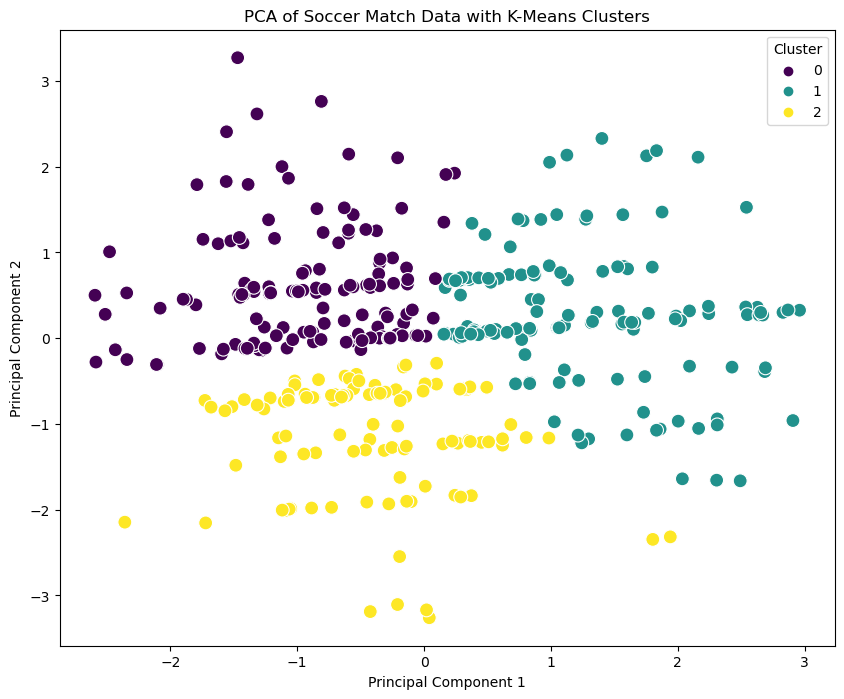

In [601]:
import pandas as pd
import glob
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load and concatenate DataFrames from multiple CSV files
all_dfs = []
for one_filename in glob.glob('data_euros/data_euros*.csv'):
    print(f'Loading {one_filename}')
    new_df = pd.read_csv(one_filename)
    all_dfs.append(new_df)

# Concatenate all DataFrames into one
df = pd.concat(all_dfs, ignore_index=True)

# Step 2: Select relevant features
features = ['home_score', 'away_score', 'match_attendance', 'stadium_capacity']
df = df[features].dropna()  # Ensure only rows with complete data for selected features are used

# Step 3: Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Step 4: Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Step 5: Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_pca)

# Step 6: Create a DataFrame for visualization
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = clusters

# Step 7: Plot the PCA results with clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis', s=100)
plt.title('PCA of Soccer Match Data with K-Means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


Loading data_euros/data_euros_2024.csv
Loading data_euros/data_euros_2008.csv
Loading data_euros/data_euros_2020.csv
Loading data_euros/data_euros_1980.csv
Loading data_euros/data_euros_1996.csv
Loading data_euros/data_euros_1968.csv
Loading data_euros/data_euros_1992.csv
Loading data_euros/data_euros_1984.csv
Loading data_euros/data_euros_1988.csv
Loading data_euros/data_euros_1976.csv
Loading data_euros/data_euros_1960.csv
Loading data_euros/data_euros_1964.csv
Loading data_euros/data_euros_1972.csv
Loading data_euros/data_euros_2004.csv
Loading data_euros/data_euros_2012.csv
Loading data_euros/data_euros_2016.csv
Loading data_euros/data_euros_2000.csv


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


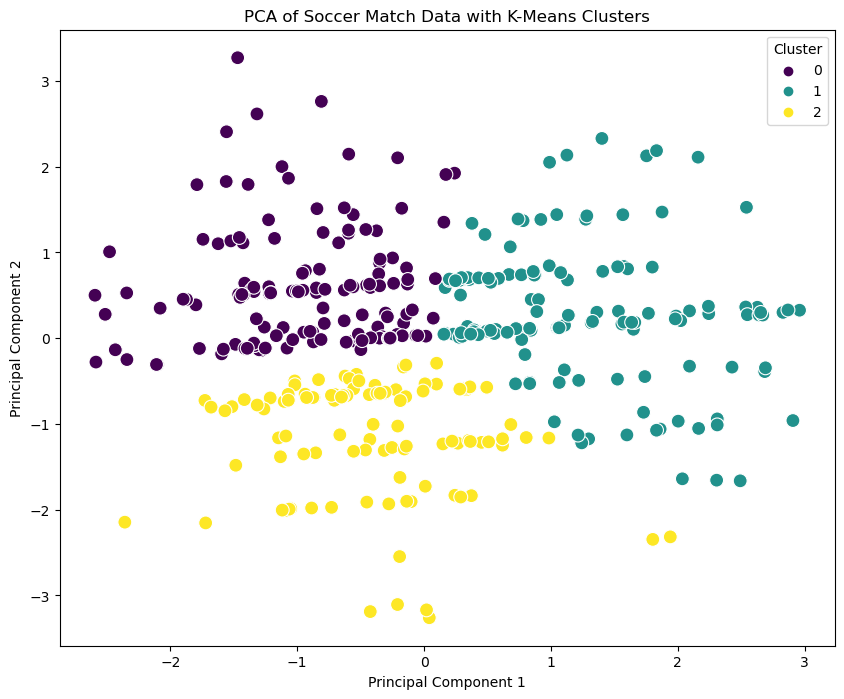

In [601]:
import pandas as pd
import glob
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load and concatenate DataFrames from multiple CSV files
all_dfs = []
for one_filename in glob.glob('data_euros/data_euros*.csv'):
    print(f'Loading {one_filename}')
    new_df = pd.read_csv(one_filename)
    all_dfs.append(new_df)

# Concatenate all DataFrames into one
df = pd.concat(all_dfs, ignore_index=True)

# Step 2: Select relevant features
features = ['home_score', 'away_score', 'match_attendance', 'stadium_capacity']
df = df[features].dropna()  # Ensure only rows with complete data for selected features are used

# Step 3: Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Step 4: Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Step 5: Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_pca)

# Step 6: Create a DataFrame for visualization
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = clusters

# Step 7: Plot the PCA results with clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis', s=100)
plt.title('PCA of Soccer Match Data with K-Means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()
